# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    arr_0=arr==0
    if len((arr[1:][arr_0[:-1]]))>0:
        max_el = arr[1:][arr_0[:-1]].max()
    else:
        max_el = "None"
    return max_el

In [3]:
max_element(np.array([1,0,8]) )

8

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [4]:
def nearest_value(X, v):
    X[abs(X-v) == abs(X-v).min()]
    return X[abs(X-v) == abs(X-v).min()][0]

In [5]:
X = np.arange(0,10).reshape((2, 5))
nearest_value(X, 3.6)

4

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [6]:
def scale(X):
    X_mean = np.matrix(X).mean(0)
    X_std = np.matrix(X).std(0)
    X_std[X_std==0]=1
    X_norm = (X - X_mean)/X_std
    return X_norm
    # Your code here

In [7]:
X_ex = np.random.randint(12,size = (4,4))
scale(X_ex)


matrix([[ 0.99558497, -0.3442142 , -0.95065415, -0.58976782],
        [-1.12832963,  1.5833853 ,  0.5118907 , -1.17953565],
        [ 0.99558497, -0.06884284,  1.38941761,  1.47441956],
        [-0.86284031, -1.17032826, -0.95065415,  0.29488391]])

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [8]:
def get_stats(X):
    X_det = np.linalg.det(X)
    X_trase = np.trace(X)
    X_max,X_min = X.max(),X.min()
    X_eig_v = np.linalg.eig(X)[0]
    X_norm = np.linalg.norm(X) 
    X_inv = np.linalg.inv(X)
    return X_det,X_trase,X_max,X_min,X_eig_v,X_norm,X_inv

In [9]:
X_test = np.random.normal(10, 1, (2,2))
get_stats(X_test)

(8.6073868198401211,
 20.549487514897912,
 11.039167187085214,
 8.7652472830358246,
 array([ 20.12172159,   0.42776592]),
 20.254317446295168,
 array([[ 1.1415037 , -1.01834011],
        [-1.28252249,  1.24592096]]))

**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [10]:
max_ell = np.array([])
for exp_num in range(100):
    X = np.random.normal(0,1, (10,10))
    Y= np.random.normal(0,1, (10,10))
    X.dot(Y)
    max_ell = np.append(max_ell,X.dot(Y).max())
print("max: ",max_ell.mean())
print("95% квантиль: ",np.percentile(max_ell, 95))

max:  8.27698581211
95% квантиль:  11.9419068941


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [11]:
import pandas as pd
%matplotlib inline

In [12]:
import pandas as pd
data = pd.read_csv("2008.csv")
data["DepDelay"].isnull().any()

True

В целевой переменной имеются пропущенные значения. 

In [13]:
print("Всего пропущенных значений ", data.isnull().values.sum())
print("Объектов с пропущенными значениями ", data.shape[0] - data.dropna(axis=0).shape[0])
print("признаков с пропущенными значениями ", data.shape[1] - data.dropna(axis=1).shape[1])
print('следовательно, данные имеют пропуски')

Всего пропущенных значений  355215
Объектов с пропущенными значениями  70000
признаков с пропущенными значениями  16
следовательно, данные имеют пропуски


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

Посмотрим на распределение заначения столбца "Cancelled"

In [14]:
print("все рейсы с пропуском в целевой переменной отменены: ",np.all(data[data["DepDelay"].isnull()]["Cancelled"]==1))
print("число отмененных рейсов, у которых DepDelay не равна None или 0:", data[~data["DepDelay"].isnull() | data["DepDelay"]!=0]["Cancelled"].sum())

все рейсы с пропуском в целевой переменной отменены:  True
число отмененных рейсов, у которых DepDelay не равна None или 0: 12


Видим, что все рейсы с пропущенной целевой переменной были отменены, а остальные почти все не были отменены. Следовательно, можно удалить признак "Cancelled" и "CancellationCode". 

In [15]:
data = data.drop(["Cancelled","CancellationCode"],axis =1)

In [16]:
data_new = (data[~data["DepDelay"].isnull() & data["DepDelay"]!=0])

y = data_new['DepDelay']
data = data_new.drop('DepDelay', 1)

In [17]:
data.shape

(63404, 26)

Удалим признаки, которые становятся известны после посадки самолета. Так как в реальной жизни у нас не будет этих признаков, чтобы прогнозировать время задержки.

In [18]:
data.drop(['ActualElapsedTime', 'CarrierDelay', 'WeatherDelay',
            'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DepTime', 'ArrDelay', 'ArrTime'], 1, inplace=True)

In [19]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'CRSElapsedTime', 'AirTime',
       'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Diverted'],
      dtype='object')

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

Так как некоторые из вышеназванных признаков я удалила, то будут преобразованы оставшиеся. 

Посмотрим,есть ли в преобразуемых признаках пропущенные значения

In [20]:
~data["CRSArrTime"].isnull().all()+~data["CRSDepTime"].isnull().all()

True

Пропущенных значений нет.

In [21]:
def time_ext(x):
    if len(str(x))<4:
        x = "0"*(4-len(str(x)))+str(x)
    else:
        x = str(x)
    if x =="2400":
        time = pd.to_datetime(0)
    else:
        time = pd.to_datetime(x,format='%H%M')
    return time.minute, time.hour

In [22]:
data["CRSDepTime_Minute"] = data["CRSDepTime"].map(lambda x:time_ext(x)[0])
data["CRSDepTime_Hour"] = data["CRSDepTime"].map(lambda x:time_ext(x)[1])

data["CRSArrTime_Minute"] = data["CRSArrTime"].map(lambda x:time_ext(x)[0])
data["CRSArrTime_Hour"]= data["CRSArrTime"].map(lambda x:time_ext(x)[1])

In [23]:
data.drop(["CRSDepTime","CRSArrTime"],1,inplace = True)

In [24]:
print("количчество признаков",len(data.columns))

количчество признаков 19


**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [25]:
data = data.drop(['TailNum', 'Year'], 1)

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

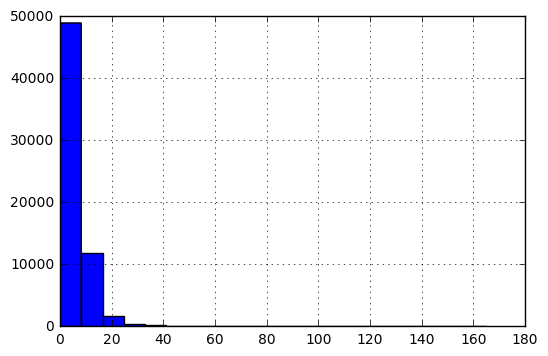

In [26]:
data['TaxiIn'].hist(bins=20)

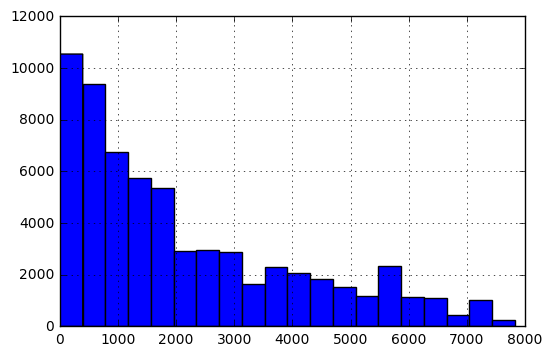

In [27]:
data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

У признака TaxiIn сильно большая разница в количестве объектов со значением от 0 до 10 и от 10 и больше. Это может повлиять на обучение. Масштабирование поможет сгладить эффект выбросов.

У признака FlightNum-номер рейса - разный масштаб.Но сама величина не должна влиять на показатель.

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cross_validation import train_test_split, KFold


C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
def transform_data(data):
    columns_cat = data.columns[data.dtypes=="object"]
    columns_real = data.columns[data.dtypes!="object"]
    
    data_cat = data[columns_cat]
    data_real = data[columns_real]
    
    data_cat = data_cat.fillna("nan")
    data_real = data_real.fillna(0)
    
    X_cat = pd.get_dummies(data_cat,dummy_na=True, drop_first=True)
    X_real = pd.DataFrame(StandardScaler().fit_transform(data_real),columns=data_real.columns,index = data_real.index)
    
    return X_real.join(X_cat)

In [30]:
X = transform_data(data)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [31]:
X = transform_data(data)
print("число признаков:",X.shape[1])

число признаков: 628


Чтобы оценки получались хорошими, добавим единичный признак. 

In [32]:
X["w0"]=1
X.head()

,Month,DayofMonth,DayOfWeek,FlightNum,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,Diverted,...,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,Dest_nan,w0
0,-0.118281,0.256485,-0.462767,-0.991600,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,-0.049021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-0.118281,-1.332050,-0.462767,0.106546,0.127377,0.064301,0.183961,-0.582387,-0.389769,-0.049021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.467662,-1.445517,1.541454,-0.207284,0.370547,0.314806,0.471018,-0.582387,-0.653345,-0.049021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-1.583137,0.823819,-0.462767,0.836931,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,-0.049021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,-0.411252,-1.332050,1.541454,-0.910960,0.442068,0.476898,0.634799,-0.582387,-0.741204,-0.049021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values, test_size=0.3,random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [35]:
model =LinearRegression().fit(X_train[:1000],y_train[:1000])
print("Train")
print("R^2",model.score(X_train[:1000],y_train[:1000]))
print("MSE ",mean_squared_error(y_train[:1000],model.predict(X_train[:1000])))

print("Test")
print("R^2",model.score(X_test,y_test))
print("MSE ",mean_squared_error(y_test,model.predict(X_test)))

Train
R^2 0.363668675266
MSE  674.394546233
Test
R^2 -2.14427897142e+21
MSE  2.86833542907e+24


In [36]:
print("w max %r, \nw_min %r \nw_mean %r"%(model.coef_.max(),model.coef_.min(),np.mean(model.coef_)))

w max 44610977113039.602, 
w_min -65634268607526.922 
w_mean 168119690775.91107


Веса сильно отличаюся друг от друга и имеют очень большие показатели. Это, а также плохие прогнозы на контрольной выборке, свидетельствуют о переобучении.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [37]:
from sklearn.linear_model import LassoCV, RidgeCV
alpha_grid  = np.linspace(-10,10,20)
model_lasso = LassoCV(alphas = alpha_grid, cv =5).fit(X_train[:1000],y_train[:1000])

print("Lasso train")
print("R^2",model_lasso.score(X_train[:1000],y_train[:1000]))
print("MSE",mean_squared_error(y_train[:1000],model_lasso.predict(X_train[:1000])))

print("Lasso test")
print("R^2",model_lasso.score(X_test,y_test))
print("MSE",mean_squared_error(y_test,model_lasso.predict(X_test)))

Lasso train
R^2 0.0560065016687
MSE 1000.46004685
Lasso test
R^2 0.0247785367832
MSE 1304.52348384


In [38]:
print("w max %r, \nw_min %r \nw_mean %r"%(model_lasso.coef_.max(),model_lasso.coef_.min(),np.mean(model_lasso.coef_)))

w max 5.3323204701231317, 
w_min -0.5604642436007975 
w_mean 0.024194698278499994


In [39]:
model_ridge = RidgeCV(alphas = alpha_grid, cv =5).fit(X_train[:1000],y_train[:1000])

print("Ridge train")
print("R^2",model_ridge.score(X_train[:1000],y_train[:1000]))
print("MSE",mean_squared_error(y_train[:1000],model_ridge.predict(X_train[:1000])))

print("Ridge test")
print("R^2",model_ridge.score(X_test,y_test))
print("MSE",mean_squared_error(y_test,model_ridge.predict(X_test)))

Ridge train
R^2 0.208146731938
MSE 839.219294478
Ridge test
R^2 0.00465787857954
MSE 1331.43826385


In [40]:
print("w max %r, \nw_min %r \nw_mean %r"%(model_ridge.coef_.max(),model_ridge.coef_.min(),np.mean(model_ridge.coef_)))

w max 21.067826746646119, 
w_min -11.092210049507942 
w_mean 0.024389669127279825


C L2 и L1 регуляризацией разброс весов уменьшился. Но качество моделей попрежнему плохое. 

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [41]:
#Уже было сделано в п.10

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [42]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return X.dot(w)


In [43]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    
    return np.mean(((y-make_pred(X,w))/y)**2)

In [44]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    return np.mean(X.T * (2 * (make_pred(X, w) - y) / (y**2)), axis=1)
    
      

In [45]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    return get_func(w, X, y) + np.dot(w[:-1], w[:-1])

In [46]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    w_1 = w
    w_1[-1] = 0
    return get_grad(w, X, y) + 2 * w_1

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [47]:
def grad_descent(X, y, w0,step_size, max_iter, eps, is_reg):
    
    w=w0
    i = 0
    norm = np.linalg.norm((w-w0))
    
    MSPE = []
    while i < max_iter and norm >=eps:
        if is_reg:
            w = w0-step_size*get_reg_grad(w0, X, y)
        else:
            w = w0-step_size*get_grad(w0, X, y)
            
        if i%5==0:
            if is_reg:
                MSPE.append(get_reg_func(w, X, y))
            else: 
                MSPE.append(get_func(w, X, y))
                
        norm = np.linalg.norm(w-w0)
        w0=w
        
        
        i = i+1
        
    return MSPE, w
        
        
        
        

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

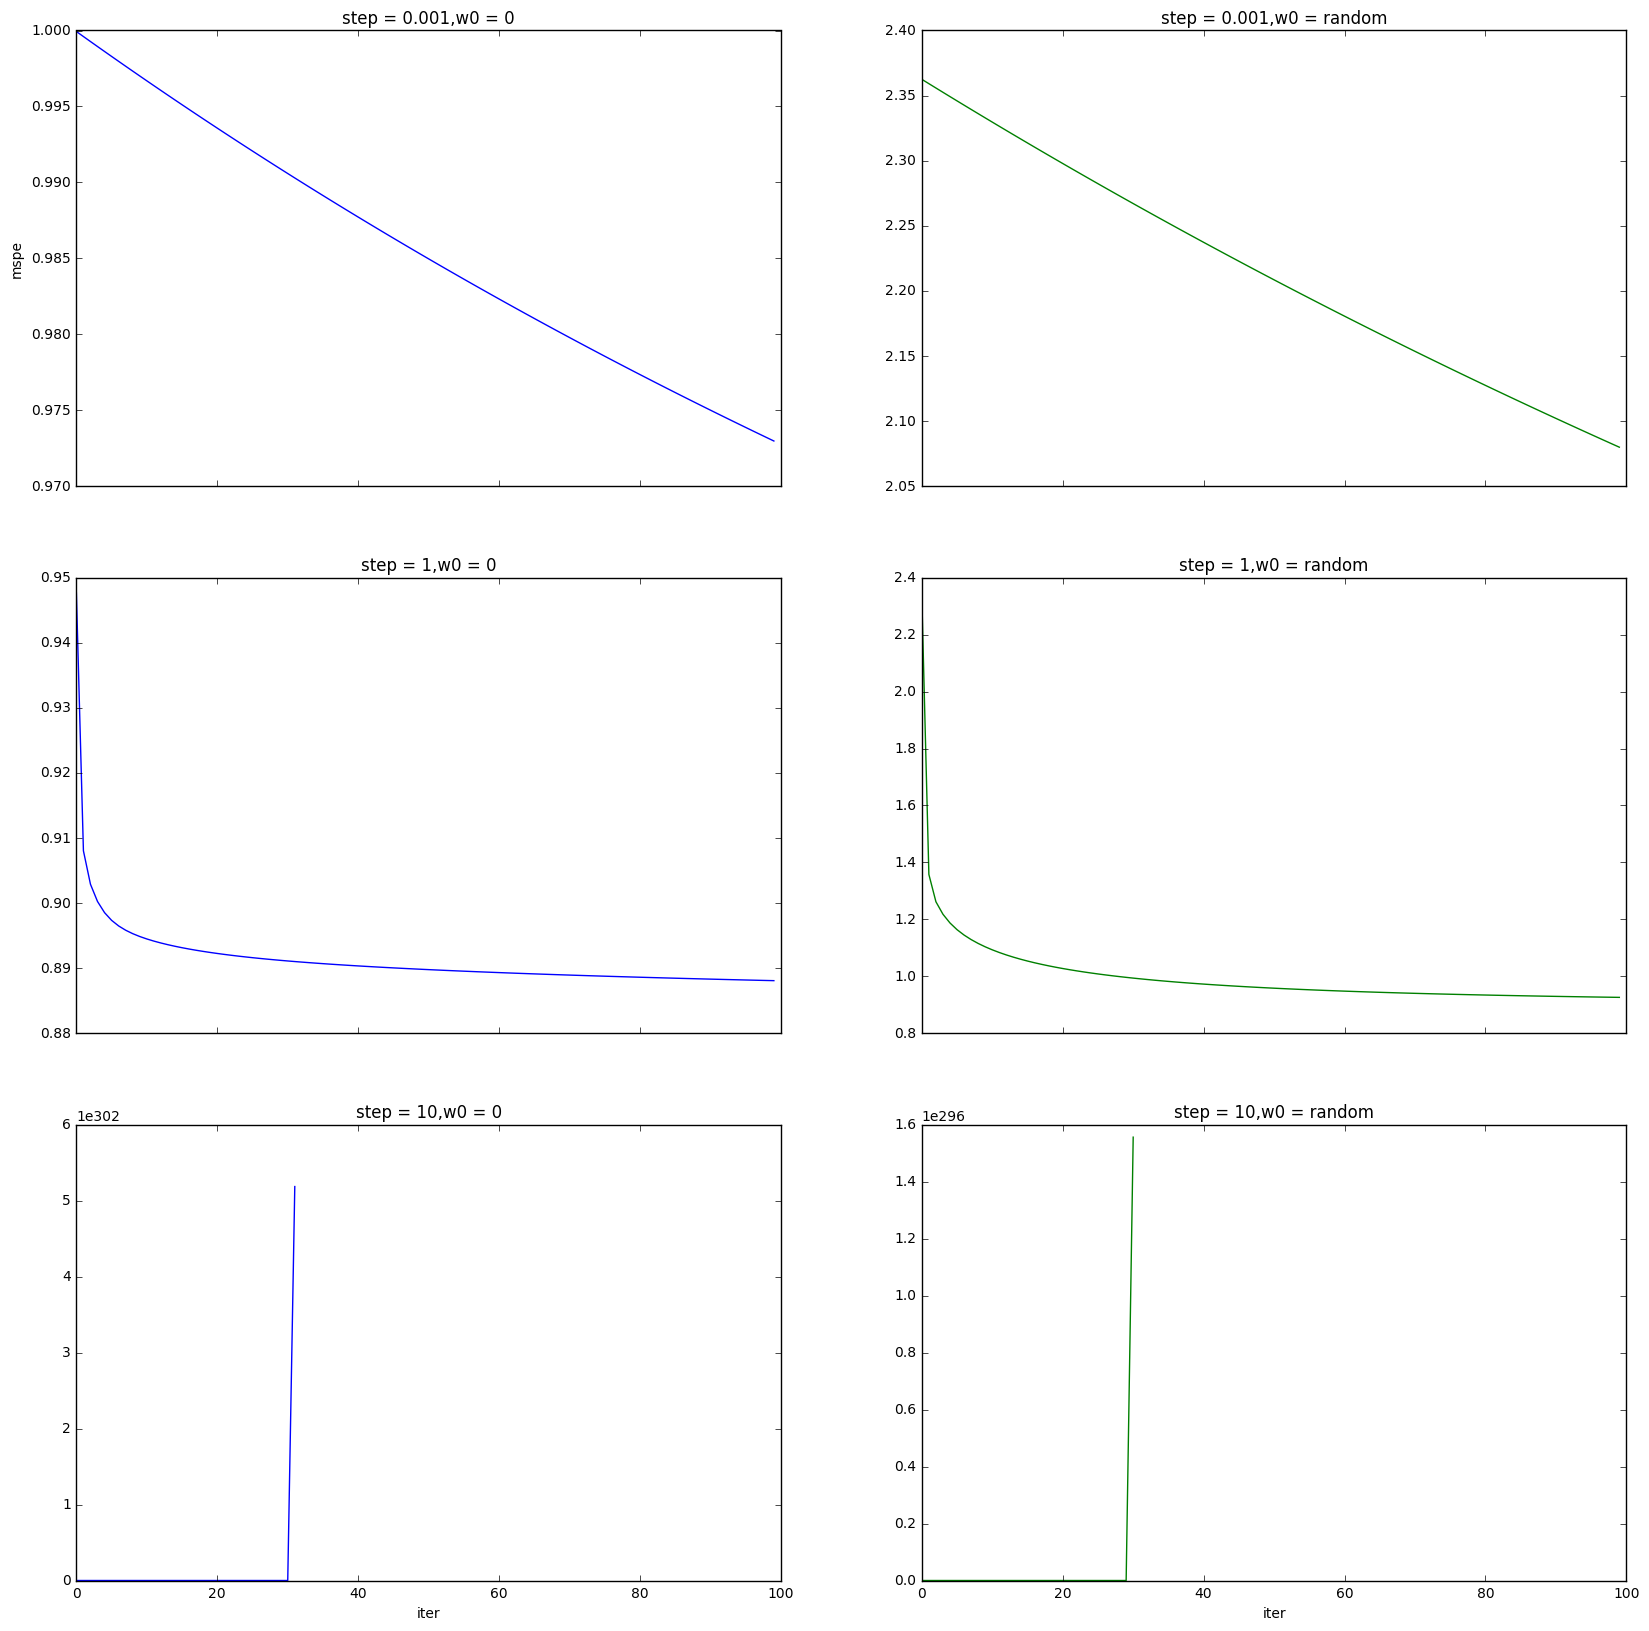

In [48]:
import matplotlib.pyplot as plt
step = [0.001, 1, 10]
f,ax = plt.subplots(3,2, sharex='col', sharey=False, figsize=(20, 20))
for i, j in enumerate(step):
    mspe_1, w_best_1 = grad_descent(X_train, y_train, np.zeros(X_train.shape[1]), j, 500, 0, False)
    mspe_2, w_best_2 = grad_descent(X_train, y_train, np.random.randn(X_train.shape[1]), j, 500, 0, False)
    ax[i][0].plot(mspe_1 )
    ax[i][1].plot(mspe_2, color = "g")
    ax[0][0].set_ylabel('mspe')
    ax[2][1].set_xlabel('iter')
    ax[2][0].set_xlabel('iter')
    ax[i][0].set_title("step = %r,w0 = 0"%(j))
    ax[i][1].set_title("step = %r,w0 = random"%(j))


Чем больше шаг, тем быстрее сходится градиент. Но при сильно большом шаге сразу расходится. Если изначально задать w=0, то начальное значение MSPE будет меньше, чем значение MSPE при рандомном выборе w. Поэтому далее будем использовать step=[1e-3,1e-2,1e-1)

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

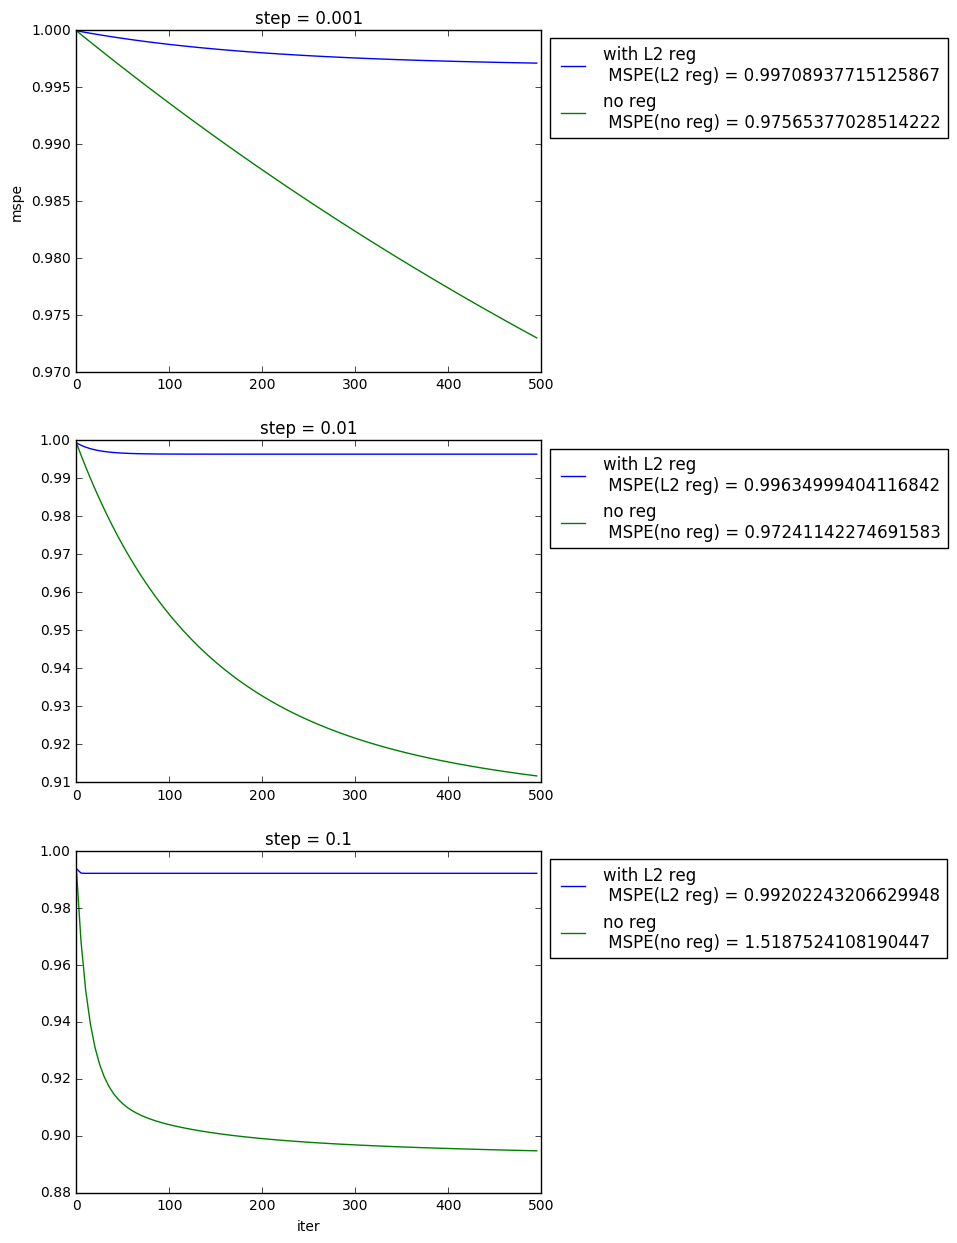

In [49]:
import matplotlib.pyplot as plt
step = [0.001, 0.01, 0.1]
f,ax = plt.subplots(3,1, figsize=(6,15))
for i, j in enumerate(step):
    mspe_1, w_best_1 = grad_descent(X_train, y_train, np.zeros(X_train.shape[1]), j, 500, 0, True)
    mspe_2, w_best_2 = grad_descent(X_train, y_train,  np.zeros(X_train.shape[1]), j, 500, 0, False)
    ax[i].plot(np.arange(len(mspe_1))*5,mspe_1, label = "with L2 reg \n MSPE(L2 reg) = %r"%(get_reg_func(w_best_1, X_train, y_train)))
    ax[i].plot(np.arange(len(mspe_2))*5,mspe_2, label = "no reg \n MSPE(no reg) = %r"%(get_reg_func(w_best_2, X_train, y_train)))
    ax[i].legend(loc='upper left',bbox_to_anchor=(1, 1))
    ax[i].set_title("step = %r"%(j))
    ax[0].set_ylabel('mspe')
    ax[2].set_xlabel('iter')

Наличие регуляризации увеличивает скорость сходимости, так как мы штрафуем за сильно большие веса, и поэтому они не могут сильно меняться.

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [50]:
def sgd(X, y,w0, step_size, max_iter, eps, is_reg):
    w=w0
    i = 0
    norm = np.linalg.norm((w-w0))
    MSPE = []
    len_X = X.shape[0]
    while i<=max_iter and norm >=eps:
        random_i = [np.random.randint(len_X)]
               
        if is_reg:
            w = w0-step_size*get_reg_grad(w0,X[random_i], y[random_i])
            
        else:
            w = w0-step_size*get_grad(w0, X[random_i], y[random_i])
            
            
        norm = np.linalg.norm(w-w0)
        w0=w
        if i%5000==0:
            if is_reg:
                MSPE.append(get_reg_func(w, X, y))
            else:
                MSPE.append(get_func(w, X, y))
            
        i = i+1
        
    return MSPE, w

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

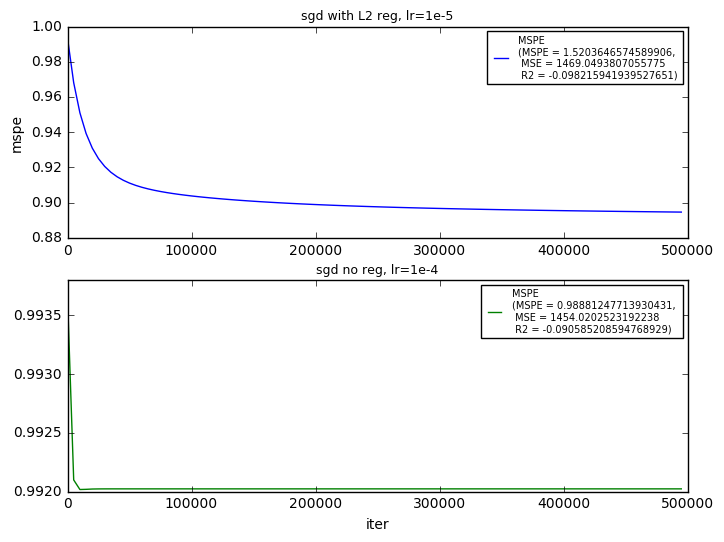

In [51]:
f,ax = plt.subplots(2,1, figsize=(8,6))

#mspe_2, w_best_2 = sgd(X_train, y_train,  np.zeros(X_train.shape[1]), 1e-5, int(5e5), 0.0, True)
mspe_reg = get_reg_func(w_best_2, X_test, y_test)
mse_reg = mean_squared_error(y_test,make_pred(X_test, w_best_2))
r2_reg = r2_score(y_test,make_pred(X_test, w_best_2))
ax[0].plot(np.arange(len(mspe_2))*5000,mspe_2,label = "MSPE \n(MSPE = %r, \n MSE = %r \n R2 = %r)"\
           %(mspe_reg,mse_reg,r2_reg))
ax[0].set_title("sgd with L2 reg, lr=1e-5",size=9)
ax[0].legend( prop={'size': 7})


#mspe_1, w_best_1 = sgd(X_train, y_train,  np.zeros(X_train.shape[1]), 1e-4, int(5e5), 0.0, False)
mspe= get_func(w_best_1, X_test, y_test)
mse = mean_squared_error(y_test,make_pred(X_test, w_best_1))
r2 = r2_score(y_train,make_pred(X_train, w_best_1))
ax[1].plot(np.arange(len(mspe_1))*5000,mspe_1,label = "MSPE \n(MSPE = %r, \n MSE = %r \n R2 = %r)"\
           %(mspe,mse,r2),color = "g")
ax[1].set_title("sgd no reg, lr=1e-4",size=9)
ax[1].legend( prop={'size': 7})
ax[0].set_ylabel('mspe')
ax[1].set_xlabel('iter')

Здесь я отдельно изобразила изменение MSPE с регуляризацией и без. 

Для sgd с L2 градиент сходится при lr = 1e-5. 

Для sgd без L2 градиент сходится при lr = 1e-4.

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

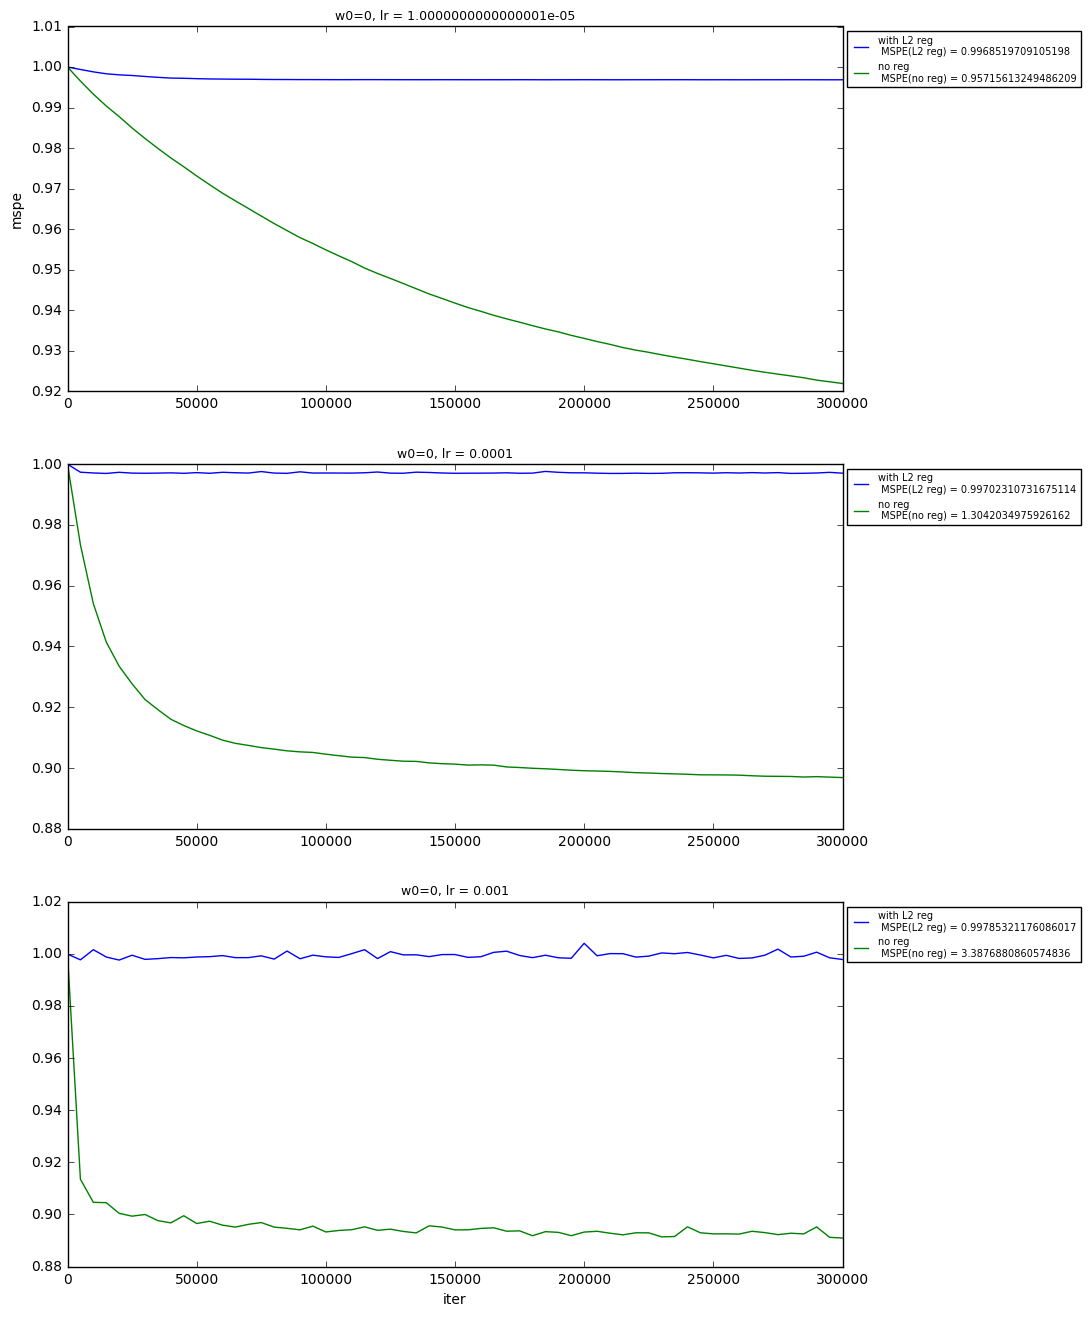

In [52]:
step = np.array([1e-5, 1e-4, 1e-3])
f,ax = plt.subplots(3,1, figsize=(10,16))
for i, j in enumerate(step):
    mspe_1, w_best_1 = sgd(X_train, y_train, np.zeros(X_train.shape[1]), j, int(3e5), 0, True)
    mspe_2, w_best_2 = sgd(X_train, y_train,  np.zeros(X_train.shape[1]), j,int(3e5), 0, False)
    ax[i].plot(np.arange(len(mspe_1))*5000,mspe_1, label = "with L2 reg \n MSPE(L2 reg) = %r"%(get_reg_func(w_best_1, X_train, y_train)))
    ax[i].plot(np.arange(len(mspe_2))*5000,mspe_2, label = "no reg \n MSPE(no reg) = %r"%(get_reg_func(w_best_2, X_train, y_train)))
    ax[i].legend(loc='upper left',bbox_to_anchor=(1, 1),prop={'size':7})
    ax[i].set_title("w0=0, lr = %r"%(j),size=9)
ax[0].set_ylabel('mspe')
ax[2].set_xlabel('iter')    

SGD с регуляризацией схдится быстрее, так как за слишком большие веса идет штраф. Потому норма векторов уменьшается быстрее, чем без регуляризации (то есть w0 и w быстрее становятся похожими). Но в данном задании нас не просят настраивать коэффициент регуляризации. Возможно, с ним ситуация поменяется.

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [53]:
model = LinearRegression()
w_lr = model.fit(X_train,y_train)


In [54]:
MSE_train = mean_squared_error(y_true=y_train,y_pred=model.predict(X_train))
MSE_test = mean_squared_error(y_true=y_test,y_pred=model.predict(X_test))

MSPE_train = get_func(w_lr.coef_, X_train,y_train)
MSPE_test = get_func(w_lr.coef_, X_test,y_test)

print("MSE_train = ",MSE_train,"MSE_test = ",MSE_test)
print("MSPE_train = ",MSPE_train,"MSPE_test = ",MSPE_test)

MSE_train =  1197.10086353 MSE_test =  1.55195490918e+19
MSPE_train =  12.4019478426 MSPE_test =  2.29579128588e+16


In [55]:
print("max w:",w_lr.coef_.max())
print("min w:",w_lr.coef_.min())

max w: 1.26452414077e+12
min w: -543334945318.0


Ошибка на тестовой выборке намного больше ошибки на обучающей выборке. Также получились огромные коэффициенты. Это может свидетельствовать о переобучении.